## Anomaly detection - SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from tqdm import tqdm

from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
# Anomaly detection(사기감지 데이터) 로드
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284806 entries, 0 to 284805
Data columns (total 31 columns):
Time      284806 non-null float64
V1        284806 non-null float64
V2        284806 non-null float64
V3        284806 non-null float64
V4        284806 non-null float64
V5        284806 non-null float64
V6        284806 non-null float64
V7        284806 non-null float64
V8        284806 non-null float64
V9        284806 non-null float64
V10       284806 non-null float64
V11       284806 non-null float64
V12       284806 non-null float64
V13       284806 non-null float64
V14       284806 non-null float64
V15       284806 non-null float64
V16       284806 non-null float64
V17       284806 non-null float64
V18       284806 non-null float64
V19       284806 non-null float64
V20       284806 non-null float64
V21       284806 non-null float64
V22       284806 non-null float64
V23       284806 non-null float64
V24       284806 non-null float64
V25       284806 non-null float64
V26  

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,284806.000000,284806.000000,...,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,2.848060e+05,284806.000000,284806.000000
mean,94813.585781,0.000002,6.661837e-07,-0.000002,0.000002,4.405007e-08,0.000002,-0.000006,0.000001,-0.000002,...,-9.166149e-07,-0.000002,-0.000001,-3.088756e-08,0.000002,0.000003,8.483873e-09,-4.792707e-08,88.349168,0.001727
std,47488.004530,1.958699,1.651311e+00,1.516257,1.415871,1.380249e+00,1.332273,1.237092,1.194355,1.098634,...,7.345251e-01,0.725702,0.624461,6.056481e-01,0.521278,0.482225,4.036332e-01,3.300838e-01,250.120432,0.041527
min,0.000000,-56.407510,-7.271573e+01,-48.325589,-5.683171,-1.137433e+02,-26.160506,-43.557242,-73.216718,-13.434066,...,-3.483038e+01,-10.933144,-44.807735,-2.836627e+00,-10.295397,-2.604551,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.250000,-0.920374,-5.985522e-01,-0.890368,-0.848642,-6.915995e-01,-0.768296,-0.554080,-0.208628,-0.643098,...,-2.283974e-01,-0.542351,-0.161846,-3.545895e-01,-0.317142,-0.326979,-7.083961e-02,-5.295995e-02,5.600000,0.000000
50%,84691.500000,0.018109,6.549621e-02,0.179846,-0.019845,-5.433621e-02,-0.274186,0.040097,0.022358,-0.051429,...,-2.945020e-02,0.006781,-0.011196,4.097671e-02,0.016596,-0.052134,1.342244e-03,1.124381e-02,22.000000,0.000000
75%,139320.000000,1.315645,8.037257e-01,1.027198,0.743348,6.119267e-01,0.398567,0.570426,0.327346,0.597140,...,1.863701e-01,0.528548,0.147641,4.395270e-01,0.350716,0.240955,9.104579e-02,7.828043e-02,77.160000,0.000000
max,172788.000000,2.454930,2.205773e+01,9.382558,16.875344,3.480167e+01,73.301626,120.589494,20.007208,15.594995,...,2.720284e+01,10.503090,22.528412,4.584549e+00,7.519589,3.517346,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
data["Class"].value_counts()

0    284314
1       492
Name: Class, dtype: int64

In [6]:
print('정상:', round(data['Class'].value_counts()[0]/len(data)*100,2), '%')
print('사기:', round(data['Class'].value_counts()[1]/len(data)*100,2), '%')

정상: 99.83 %
사기: 0.17 %


상당히 imbalance한 데이터이므로 **-> undersampling** 하여 데이터를 분석해보기로 한다 
* 그냥 데이터를 트레이닝 시키면 무조건 사기가 아니라고 판별해 버릴 가능성이 높기 때문
* 또한, 그대로 트레이닝을 돌리게 되면 엄청나게 많은 데이터 양 때문에 트레이닝조차 힘들어 질 것 

In [7]:
data_nofraud = data.loc[data["Class"] == 0]
data_fraud = data.loc[data["Class"] == 1]

In [8]:
data_nofraud2= data_nofraud.sample(frac = 0.002, random_state=28)

In [9]:
df = pd.concat([data_fraud, data_nofraud2], axis=0)
df = df.sample(frac=1, random_state=42) # Shuffle dataframe rows

df["Class"].value_counts()

0    569
1    492
Name: Class, dtype: int64

In [10]:
print('정상:', round(df['Class'].value_counts()[0]/len(df)*100,2), '%')
print('사기:', round(df['Class'].value_counts()[1]/len(df)*100,2), '%')

정상: 53.63 %
사기: 46.37 %


In [11]:
X = df.drop('Class',axis = 1)
y = df["Class"]

In [12]:
X.shape, y.shape

((1061, 30), (1061,))

In [13]:
# scaling 
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [14]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

#### linear model

In [15]:
# linear model
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred)) 

Accuracy Score: 0.9436619718309859


In [16]:
C_range=list(np.arange(1,80,1)) # C값은 1부터 80까지 1간격으로
acc_score = [] # 결과를 보관할 list

for c in tqdm(C_range):
    svc = SVC(kernel='linear', C=c, gamma = 'scale')
    scores = cross_validate(svc, X, y, cv=10, scoring='accuracy') # 점수를 리스트로 관리
    score = np.mean(scores['test_score']) #10개 스코어 값의 평균
    acc_score.append(score) 
    
print(np.max(acc_score)) #제일 좋은 결과
print(C_range[np.argmax(acc_score)]) #제일 좋은 결과가 나온 파라미터

100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [03:32<00:00,  4.94s/it]


0.9490732297150919
3


Text(0, 0.5, 'Cross-Validated Accuracy')

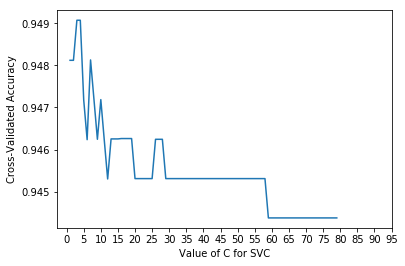

In [17]:
C_range=list(np.arange(1,80,1))
plt.plot(C_range,acc_score)
plt.xticks(np.arange(0,100,5))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

* C=3 일때 가장 좋은 성능을 얻는다 
* C값이 커질수록 성능이 떨어진다 

#### rbf kernel

In [18]:
# rbf kernel
svc_rbf = SVC(kernel='rbf', gamma = 1) 
svc_rbf.fit(X_train,y_train)
y_pred = svc_rbf.predict(X_test)
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.7136150234741784


In [19]:
C_range=list(np.arange(1,80,1)) # C값은 1부터 80까지 1간격으로
acc_score = [] # 결과를 보관할 list

for c in tqdm(C_range):
    svc = SVC(kernel='rbf', C=c, gamma = 'scale')
    scores = cross_validate(svc, X, y, cv=10, scoring='accuracy') # 점수를 리스트로 관리
    score = np.mean(scores['test_score']) #10개 스코어 값의 평균
    acc_score.append(score) 
    
print(np.max(acc_score)) #제일 좋은 결과
print(C_range[np.argmax(acc_score)]) #제일 좋은 결과가 나온 파라미터

100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:41<00:00,  2.09it/s]


0.9443650653701792
31


Text(0, 0.5, 'Cross-Validated Accuracy')

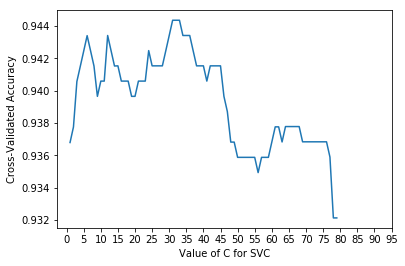

In [20]:
C_range=list(np.arange(1,80,1))
plt.plot(C_range,acc_score)
plt.xticks(np.arange(0,100,5))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

* rbf kernel일때는 감마값이 클 때 (31정도에서) 성능이 좋은 편이다 

#### Support Vector Classifier 
* hyperparameter tuning - **Grid Search**

In [21]:
# Support Vector Classifier
svc_params = {'C': [0.1, 0.5, 0.9, 1, 3, 5, 10, 30], 'kernel': ['rbf', 'linear'], 'gamma': [0.5, 1, 3, 5, 10, 30]}
grid_svc = GridSearchCV(SVC(), svc_params, cv=10, scoring='accuracy', verbose = 3)
grid_svc.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=0.1, gamma=0.5, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.5, kernel=rbf, score=0.5411764705882353, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] C=0.1, gamma=0.5, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.5, kernel=rbf, score=0.5529411764705883, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] C=0.1, gamma=0.5, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.5, kernel=rbf, score=0.5411764705882353, total=   0.0s
[CV] C=0.1, gamma=0.5, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.5, kernel=rbf, score=0.5411764705882353, total=   0.0s
[CV] C=0.1, gamma=0.5, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.5, kernel=rbf, score=0.5411764705882353, total=   0.0s
[CV] C=0.1, gamma=0.5, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.5, kernel=rbf, score=0.5411764705882353, total=   0.0s
[CV] C=0.1, gamma=0.5, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.5, kernel=rbf, score=0.5411764705882353, total=   0.0s
[CV] C=0.1, gamma=0.5, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.5, kernel=rbf, score=0.5411764705882353, total=   0.0s
[CV] C=0.1, gamma=0.5, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.5, kernel=rbf, score=0.535

[CV]  C=0.1, gamma=3, kernel=linear, score=0.9411764705882353, total=   0.0s
[CV] C=0.1, gamma=3, kernel=linear ...................................
[CV]  C=0.1, gamma=3, kernel=linear, score=0.9404761904761905, total=   0.0s
[CV] C=0.1, gamma=3, kernel=linear ...................................
[CV]  C=0.1, gamma=3, kernel=linear, score=0.9047619047619048, total=   0.0s
[CV] C=0.1, gamma=5, kernel=rbf ......................................
[CV]  C=0.1, gamma=5, kernel=rbf, score=0.5411764705882353, total=   0.0s
[CV] C=0.1, gamma=5, kernel=rbf ......................................
[CV]  C=0.1, gamma=5, kernel=rbf, score=0.5411764705882353, total=   0.0s
[CV] C=0.1, gamma=5, kernel=rbf ......................................
[CV]  C=0.1, gamma=5, kernel=rbf, score=0.5411764705882353, total=   0.0s
[CV] C=0.1, gamma=5, kernel=rbf ......................................
[CV]  C=0.1, gamma=5, kernel=rbf, score=0.5411764705882353, total=   0.0s
[CV] C=0.1, gamma=5, kernel=rbf ...............

[CV] C=0.1, gamma=30, kernel=linear ..................................
[CV]  C=0.1, gamma=30, kernel=linear, score=0.9058823529411765, total=   0.0s
[CV] C=0.1, gamma=30, kernel=linear ..................................
[CV]  C=0.1, gamma=30, kernel=linear, score=0.9294117647058824, total=   0.0s
[CV] C=0.1, gamma=30, kernel=linear ..................................
[CV]  C=0.1, gamma=30, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=0.1, gamma=30, kernel=linear ..................................
[CV]  C=0.1, gamma=30, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=0.1, gamma=30, kernel=linear ..................................
[CV]  C=0.1, gamma=30, kernel=linear, score=0.9411764705882353, total=   0.0s
[CV] C=0.1, gamma=30, kernel=linear ..................................
[CV]  C=0.1, gamma=30, kernel=linear, score=0.9404761904761905, total=   0.0s
[CV] C=0.1, gamma=30, kernel=linear ..................................
[CV]  C=0.1, gamma=30, kernel=linea

[CV]  C=0.5, gamma=3, kernel=rbf, score=0.5595238095238095, total=   0.0s
[CV] C=0.5, gamma=3, kernel=rbf ......................................
[CV]  C=0.5, gamma=3, kernel=rbf, score=0.5595238095238095, total=   0.0s
[CV] C=0.5, gamma=3, kernel=linear ...................................
[CV]  C=0.5, gamma=3, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=0.5, gamma=3, kernel=linear ...................................
[CV]  C=0.5, gamma=3, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=0.5, gamma=3, kernel=linear ...................................
[CV]  C=0.5, gamma=3, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=0.5, gamma=3, kernel=linear ...................................
[CV]  C=0.5, gamma=3, kernel=linear, score=0.9058823529411765, total=   0.0s
[CV] C=0.5, gamma=3, kernel=linear ...................................
[CV]  C=0.5, gamma=3, kernel=linear, score=0.9294117647058824, total=   0.0s
[CV] C=0.5, gamma=3, kernel=linear ......

[CV] C=0.5, gamma=30, kernel=rbf .....................................
[CV]  C=0.5, gamma=30, kernel=rbf, score=0.5411764705882353, total=   0.0s
[CV] C=0.5, gamma=30, kernel=rbf .....................................
[CV]  C=0.5, gamma=30, kernel=rbf, score=0.5647058823529412, total=   0.0s
[CV] C=0.5, gamma=30, kernel=rbf .....................................
[CV]  C=0.5, gamma=30, kernel=rbf, score=0.5411764705882353, total=   0.0s
[CV] C=0.5, gamma=30, kernel=rbf .....................................
[CV]  C=0.5, gamma=30, kernel=rbf, score=0.5529411764705883, total=   0.0s
[CV] C=0.5, gamma=30, kernel=rbf .....................................
[CV]  C=0.5, gamma=30, kernel=rbf, score=0.5476190476190477, total=   0.0s
[CV] C=0.5, gamma=30, kernel=rbf .....................................
[CV]  C=0.5, gamma=30, kernel=rbf, score=0.5476190476190477, total=   0.0s
[CV] C=0.5, gamma=30, kernel=linear ..................................
[CV]  C=0.5, gamma=30, kernel=linear, score=0.9529411

[CV]  C=0.9, gamma=1, kernel=linear, score=0.8928571428571429, total=   0.0s
[CV] C=0.9, gamma=3, kernel=rbf ......................................
[CV]  C=0.9, gamma=3, kernel=rbf, score=0.6823529411764706, total=   0.0s
[CV] C=0.9, gamma=3, kernel=rbf ......................................
[CV]  C=0.9, gamma=3, kernel=rbf, score=0.6235294117647059, total=   0.0s
[CV] C=0.9, gamma=3, kernel=rbf ......................................
[CV]  C=0.9, gamma=3, kernel=rbf, score=0.5882352941176471, total=   0.0s
[CV] C=0.9, gamma=3, kernel=rbf ......................................
[CV]  C=0.9, gamma=3, kernel=rbf, score=0.5882352941176471, total=   0.0s
[CV] C=0.9, gamma=3, kernel=rbf ......................................
[CV]  C=0.9, gamma=3, kernel=rbf, score=0.6235294117647059, total=   0.0s
[CV] C=0.9, gamma=3, kernel=rbf ......................................
[CV]  C=0.9, gamma=3, kernel=rbf, score=0.6352941176470588, total=   0.0s
[CV] C=0.9, gamma=3, kernel=rbf .....................

[CV] C=0.9, gamma=10, kernel=linear ..................................
[CV]  C=0.9, gamma=10, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=0.9, gamma=10, kernel=linear ..................................
[CV]  C=0.9, gamma=10, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=0.9, gamma=10, kernel=linear ..................................
[CV]  C=0.9, gamma=10, kernel=linear, score=0.9411764705882353, total=   0.0s
[CV] C=0.9, gamma=10, kernel=linear ..................................
[CV]  C=0.9, gamma=10, kernel=linear, score=0.9404761904761905, total=   0.0s
[CV] C=0.9, gamma=10, kernel=linear ..................................
[CV]  C=0.9, gamma=10, kernel=linear, score=0.8928571428571429, total=   0.0s
[CV] C=0.9, gamma=30, kernel=rbf .....................................
[CV]  C=0.9, gamma=30, kernel=rbf, score=0.5764705882352941, total=   0.0s
[CV] C=0.9, gamma=30, kernel=rbf .....................................
[CV]  C=0.9, gamma=30, kernel=rbf, sco

[CV]  C=1, gamma=1, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=0.9176470588235294, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=0.9411764705882353, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=1, gamma=1, kernel=linear ................

[CV] C=1, gamma=10, kernel=rbf .......................................
[CV]  C=1, gamma=10, kernel=rbf, score=0.5882352941176471, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV]  C=1, gamma=10, kernel=rbf, score=0.5833333333333334, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV]  C=1, gamma=10, kernel=rbf, score=0.5952380952380952, total=   0.0s
[CV] C=1, gamma=10, kernel=linear ....................................
[CV]  C=1, gamma=10, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=1, gamma=10, kernel=linear ....................................
[CV]  C=1, gamma=10, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=1, gamma=10, kernel=linear ....................................
[CV]  C=1, gamma=10, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=1, gamma=10, kernel=linear ....................................
[CV]  C=1, gamma=10, kernel=linear, score=0.917647058823

[CV] C=3, gamma=1, kernel=rbf ........................................
[CV]  C=3, gamma=1, kernel=rbf, score=0.6941176470588235, total=   0.0s
[CV] C=3, gamma=1, kernel=rbf ........................................
[CV]  C=3, gamma=1, kernel=rbf, score=0.7411764705882353, total=   0.0s
[CV] C=3, gamma=1, kernel=rbf ........................................
[CV]  C=3, gamma=1, kernel=rbf, score=0.7411764705882353, total=   0.0s
[CV] C=3, gamma=1, kernel=rbf ........................................
[CV]  C=3, gamma=1, kernel=rbf, score=0.6823529411764706, total=   0.0s
[CV] C=3, gamma=1, kernel=rbf ........................................
[CV]  C=3, gamma=1, kernel=rbf, score=0.7058823529411765, total=   0.2s
[CV] C=3, gamma=1, kernel=rbf ........................................
[CV]  C=3, gamma=1, kernel=rbf, score=0.7380952380952381, total=   0.0s
[CV] C=3, gamma=1, kernel=rbf ........................................
[CV]  C=3, gamma=1, kernel=rbf, score=0.7023809523809523, total=   0.0s

[CV]  C=3, gamma=5, kernel=linear, score=0.9047619047619048, total=   0.0s
[CV] C=3, gamma=10, kernel=rbf .......................................
[CV]  C=3, gamma=10, kernel=rbf, score=0.6705882352941176, total=   0.0s
[CV] C=3, gamma=10, kernel=rbf .......................................
[CV]  C=3, gamma=10, kernel=rbf, score=0.6235294117647059, total=   0.0s
[CV] C=3, gamma=10, kernel=rbf .......................................
[CV]  C=3, gamma=10, kernel=rbf, score=0.5882352941176471, total=   0.0s
[CV] C=3, gamma=10, kernel=rbf .......................................
[CV]  C=3, gamma=10, kernel=rbf, score=0.5882352941176471, total=   0.0s
[CV] C=3, gamma=10, kernel=rbf .......................................
[CV] ............. C=3, gamma=10, kernel=rbf, score=0.6, total=   0.0s
[CV] C=3, gamma=10, kernel=rbf .......................................
[CV]  C=3, gamma=10, kernel=rbf, score=0.6235294117647059, total=   0.0s
[CV] C=3, gamma=10, kernel=rbf ................................

[CV]  C=5, gamma=0.5, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=5, gamma=0.5, kernel=linear ...................................
[CV]  C=5, gamma=0.5, kernel=linear, score=0.9411764705882353, total=   0.0s
[CV] C=5, gamma=0.5, kernel=linear ...................................
[CV]  C=5, gamma=0.5, kernel=linear, score=0.9411764705882353, total=   0.0s
[CV] C=5, gamma=0.5, kernel=linear ...................................
[CV]  C=5, gamma=0.5, kernel=linear, score=0.9404761904761905, total=   0.0s
[CV] C=5, gamma=0.5, kernel=linear ...................................
[CV]  C=5, gamma=0.5, kernel=linear, score=0.9166666666666666, total=   0.0s
[CV] C=5, gamma=1, kernel=rbf ........................................
[CV]  C=5, gamma=1, kernel=rbf, score=0.788235294117647, total=   0.0s
[CV] C=5, gamma=1, kernel=rbf ........................................
[CV]  C=5, gamma=1, kernel=rbf, score=0.7411764705882353, total=   0.0s
[CV] C=5, gamma=1, kernel=rbf ................

[CV] C=5, gamma=5, kernel=linear .....................................
[CV]  C=5, gamma=5, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=5, gamma=5, kernel=linear .....................................
[CV]  C=5, gamma=5, kernel=linear, score=0.9176470588235294, total=   0.0s
[CV] C=5, gamma=5, kernel=linear .....................................
[CV]  C=5, gamma=5, kernel=linear, score=0.9411764705882353, total=   0.0s
[CV] C=5, gamma=5, kernel=linear .....................................
[CV]  C=5, gamma=5, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=5, gamma=5, kernel=linear .....................................
[CV]  C=5, gamma=5, kernel=linear, score=0.9411764705882353, total=   0.0s
[CV] C=5, gamma=5, kernel=linear .....................................
[CV]  C=5, gamma=5, kernel=linear, score=0.9411764705882353, total=   0.0s
[CV] C=5, gamma=5, kernel=linear .....................................
[CV]  C=5, gamma=5, kernel=linear, score=0.9404761904

[CV] C=10, gamma=0.5, kernel=rbf .....................................
[CV]  C=10, gamma=0.5, kernel=rbf, score=0.9047619047619048, total=   0.0s
[CV] C=10, gamma=0.5, kernel=rbf .....................................
[CV]  C=10, gamma=0.5, kernel=rbf, score=0.8333333333333334, total=   0.0s
[CV] C=10, gamma=0.5, kernel=linear ..................................
[CV]  C=10, gamma=0.5, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=10, gamma=0.5, kernel=linear ..................................
[CV]  C=10, gamma=0.5, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=10, gamma=0.5, kernel=linear ..................................
[CV]  C=10, gamma=0.5, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=10, gamma=0.5, kernel=linear ..................................
[CV]  C=10, gamma=0.5, kernel=linear, score=0.9176470588235294, total=   0.0s
[CV] C=10, gamma=0.5, kernel=linear ..................................
[CV]  C=10, gamma=0.5, kernel=linear, sco

[CV] C=10, gamma=5, kernel=rbf .......................................
[CV]  C=10, gamma=5, kernel=rbf, score=0.6235294117647059, total=   0.0s
[CV] C=10, gamma=5, kernel=rbf .......................................
[CV]  C=10, gamma=5, kernel=rbf, score=0.6352941176470588, total=   0.0s
[CV] C=10, gamma=5, kernel=rbf .......................................
[CV]  C=10, gamma=5, kernel=rbf, score=0.5882352941176471, total=   0.0s
[CV] C=10, gamma=5, kernel=rbf .......................................
[CV] ............. C=10, gamma=5, kernel=rbf, score=0.6, total=   0.0s
[CV] C=10, gamma=5, kernel=rbf .......................................
[CV]  C=10, gamma=5, kernel=rbf, score=0.5833333333333334, total=   0.0s
[CV] C=10, gamma=5, kernel=rbf .......................................
[CV]  C=10, gamma=5, kernel=rbf, score=0.6071428571428571, total=   0.0s
[CV] C=10, gamma=5, kernel=linear ....................................
[CV]  C=10, gamma=5, kernel=linear, score=0.9529411764705882, total

[CV] C=30, gamma=0.5, kernel=rbf .....................................
[CV]  C=30, gamma=0.5, kernel=rbf, score=0.8823529411764706, total=   0.0s
[CV] C=30, gamma=0.5, kernel=rbf .....................................
[CV]  C=30, gamma=0.5, kernel=rbf, score=0.9058823529411765, total=   0.0s
[CV] C=30, gamma=0.5, kernel=rbf .....................................
[CV]  C=30, gamma=0.5, kernel=rbf, score=0.8705882352941177, total=   0.0s
[CV] C=30, gamma=0.5, kernel=rbf .....................................
[CV]  C=30, gamma=0.5, kernel=rbf, score=0.8117647058823529, total=   0.0s
[CV] C=30, gamma=0.5, kernel=rbf .....................................
[CV]  C=30, gamma=0.5, kernel=rbf, score=0.8823529411764706, total=   0.0s
[CV] C=30, gamma=0.5, kernel=rbf .....................................
[CV]  C=30, gamma=0.5, kernel=rbf, score=0.8941176470588236, total=   0.0s
[CV] C=30, gamma=0.5, kernel=rbf .....................................
[CV]  C=30, gamma=0.5, kernel=rbf, score=0.8705882352

[CV] C=30, gamma=3, kernel=linear ....................................
[CV]  C=30, gamma=3, kernel=linear, score=0.9411764705882353, total=   0.1s
[CV] C=30, gamma=3, kernel=linear ....................................
[CV]  C=30, gamma=3, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=30, gamma=3, kernel=linear ....................................
[CV]  C=30, gamma=3, kernel=linear, score=0.9404761904761905, total=   0.0s
[CV] C=30, gamma=3, kernel=linear ....................................
[CV]  C=30, gamma=3, kernel=linear, score=0.9166666666666666, total=   0.0s
[CV] C=30, gamma=5, kernel=rbf .......................................
[CV]  C=30, gamma=5, kernel=rbf, score=0.6823529411764706, total=   0.0s
[CV] C=30, gamma=5, kernel=rbf .......................................
[CV]  C=30, gamma=5, kernel=rbf, score=0.6235294117647059, total=   0.0s
[CV] C=30, gamma=5, kernel=rbf .......................................
[CV]  C=30, gamma=5, kernel=rbf, score=0.588235294117

[CV] C=30, gamma=30, kernel=linear ...................................
[CV]  C=30, gamma=30, kernel=linear, score=0.9529411764705882, total=   0.1s
[CV] C=30, gamma=30, kernel=linear ...................................
[CV]  C=30, gamma=30, kernel=linear, score=0.9176470588235294, total=   0.1s
[CV] C=30, gamma=30, kernel=linear ...................................
[CV]  C=30, gamma=30, kernel=linear, score=0.9411764705882353, total=   0.1s
[CV] C=30, gamma=30, kernel=linear ...................................
[CV]  C=30, gamma=30, kernel=linear, score=0.9647058823529412, total=   0.1s
[CV] C=30, gamma=30, kernel=linear ...................................
[CV]  C=30, gamma=30, kernel=linear, score=0.9411764705882353, total=   0.0s
[CV] C=30, gamma=30, kernel=linear ...................................
[CV]  C=30, gamma=30, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=30, gamma=30, kernel=linear ...................................
[CV]  C=30, gamma=30, kernel=linear, scor

[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:  1.5min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 0.5, 0.9, 1, 3, 5, 10, 30], 'kernel': ['rbf', 'linear'], 'gamma': [0.5, 1, 3, 5, 10, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=3)

In [22]:
print(grid_svc.best_params_)

{'C': 0.1, 'gamma': 0.5, 'kernel': 'linear'}


In [23]:
print(grid_svc.best_score_)

0.9445754716981132


In [24]:
svm_temp = SVC(kernel = 'linear', gamma = 0.5, C = 0.1)

-> linear kernel trick을 사용하고, gamma = 0.5, C=0.1 만큼 약한 가중치를 주었을 때 가장 좋은 성능을 갖는다. 

In [25]:
svm_temp.fit(X_train,y_train)
y_pred = svm_temp.predict(X_test) # 훈련한 모델로 test셋에 적용 
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred)) 

Accuracy Score: 0.9248826291079812


#### +) confusion matrix

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels=[1, 0])

array([[ 87,  15],
       [  1, 110]], dtype=int64)